<a href="https://colab.research.google.com/github/araldi/Python_for_biomedical_data_analysis/blob/main/08_Statistics_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set the random seed. This is necessary for commands that rely on randomness, and allows for reproducibility among researchers.

In [2]:
import random

random.seed(2023)

# Distributions demo

## Binomial distribution:

$k=\textstyle {n \choose k}\, p^k (1-p)^{n-k}$

parameters:
    - n: number of tries
    - p: probability of success at each try
defines the probability of having N "successes" in a series of n independent identical success/failure experiment. The case of n=1 and p=0.5 is describe a fair coin toss.

mean: np

variance: np*(1-p)

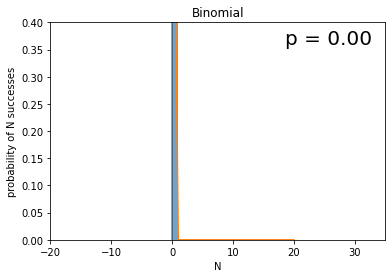

In [ ]:
Ndistribs = 20 #number of distributions
ssize = 1000 #sample size

#binomial distribution parameters n,p
n = 20 # n parameter
ps = np.linspace(0, 1.0, n) # p parameter

t = np.linspace(0, n, n+1).astype(int) # x axis
y = np.zeros((Ndistribs, ssize)) #container for the distributions
ls = np.zeros((Ndistribs, len(t))) #container for gaussians corresponding to the distribs

#loop to generate a distribution for each p value
for i,j in enumerate(ps):
    # binomial
    y[i] = sp.stats.binom.rvs(n=n, p=j, size=ssize)
    # gaussian with same mean
    ls[i] = sp.stats.binom.pmf(t, n=n, p=j)

#prepare figure
fig, ax = pl.subplots();
ax.axis([-20, 35, 0, 0.4]);

# get and plot histogram of initial distributions
y0 = np.histogram(y[0], bins=t, density=1)[0]
n, bins, patches = plt.hist(y0, bins=t, density=1,
                            facecolor='SteelBlue', alpha=0.75);
#plot Gaussians
l,= ax.plot(t, ls[i]);

#add label
texts = ax.text(0.70, 0.9,  'p = %.2f'%ps[0], transform=ax.transAxes,
               fontsize=20)

#line at 0
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
#axis labels
ax.set_title("Binomial")
ax.set_ylabel("probability of N successes")
ax.set_xlabel("N")

#animation function
def animate(i):
    ''' matplotlib animation call
    i: loop iterator
    returns the patches
    '''
    n, _ = np.histogram(y[i], bins=t, density=1)
    for rect, h in zip(patches, n):
        #regenerate histogram
        rect.set_height(h)
    #regenerate gaussian line
    l.set_data(t, ls[i])
    #regenerate label
    texts.set_text('p = %.2f'%ps[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y));
HTML(ani.to_jshtml())

## Poisson distribution:
$k=\frac{\lambda^k}{k!} e^{-\lambda}$

parameters:
    - lambda: number of tries
A discrete distribution that expresses the probability of a number of events
occurring in a fixed period of time if these events occur with a known average rate
and independently of the time since the last event. More here http://individual.utoronto.ca/zheli/poisson.pdf

mean: lambda

variance: lambda


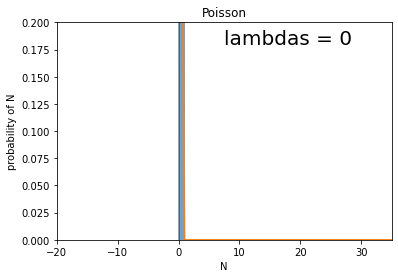

In [ ]:
Ndistribs = 20 #number of distributions

#Poisson distribution parameters lambda
n = 20 # n parameter
lambdas = np.linspace(0, Ndistribs-1, Ndistribs).astype(int)# lambda parameter

t = np.linspace(0, n*2, n*2+1).astype(int) # x axis
y = np.zeros((Ndistribs, ssize)) #container for the distributions
ls = np.zeros((Ndistribs, len(t))) #container for gaussians corresponding to the distribs


#loop to generate a distribution for each p value
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.poisson.rvs(size=ssize, mu=j)
    ls[i] = sp.stats.poisson.pmf(t, mu=j)
    #pl.figure()
    #pl.hist(y[i])

#prepare figure
fig, ax = pl.subplots();
ax.axis([-n, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1,
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.50, 0.9,  'lambdas = %d'%lambdas[0], transform=ax.transAxes,
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Poisson")
ax.set_ylabel("probability of N")
ax.set_xlabel("N")

def animate(i):
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    l.set_data(t, ls[i])
    texts.set_text('lambdas = %d'%lambdas[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())

## Gaussian

$x= \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

parameters:
    - mu: mean
    - sigma: standard deviation
It relates to the Central Limit Theorem:
(Under some conditions which include finite variance) the averages of samples
of random variables independently drawn from _any_ distributions
converge in distribution to the normal, i.e.,
they become normally distributed with mean equal to the expected value and
sdtandard deviation equal to the square root of the mean.

Also referred to Normal if mean is 0 and Standard Normal if mean is 0 and standard deviation is 1

mean: mu

variance: sigma^2

changing mu


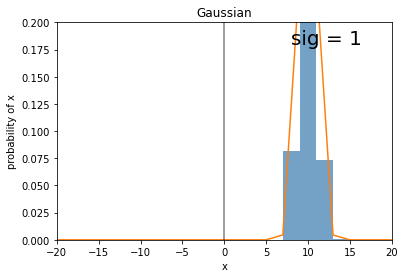

In [ ]:
Ndistribs = 21
nminmax = 35
t = np.linspace(-nminmax, nminmax, nminmax+1).astype(int)
y = np.zeros((Ndistribs, ssize))
ls = np.zeros((Ndistribs, len(t)))
sigs = np.linspace(1, Ndistribs, Ndistribs).astype(int) # parameter variance
mu = 10 # parameter mean

for i,j in enumerate(sigs):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=mu, scale=j)
    ls[i] = sp.stats.norm.pdf(t, loc=mu, scale=j)
    #pl.figure()
    #pl.hist(y[i])

fig, ax = pl.subplots()
ax.axis([-20, 20, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1,
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'sig = %d'%sigs[0], transform=ax.transAxes,
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    l.set_data(t, ls[i])
    texts.set_text('sig = %d'%sigs[i])
    return patches
print(r"changing mu")
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())


changing mu


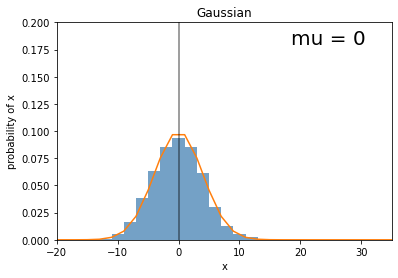

In [ ]:
sig = 4
mus = np.linspace(0, 20, 21).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=j, scale=sig)
    ls[i] = sp.stats.norm.pdf(t, loc=j, scale=sig)
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1,
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'mu = %d'%mus[0], transform=ax.transAxes,
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('mu = %d'%mus[i])
    l.set_data(t, ls[i])
    return patches

print(r"changing mu")
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())

## Chi-Square

$x=\frac{1}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)}\\; x^{\frac{k}{2}-1} e^{-\frac{x}{2}}$

parameters:
    - k: degrees of freedom
the distribution of a sum of the squares of k independent standard normal random variables. The most common distribution in Null Hypothesis Rejection Testing

mean: k

variance: 2k

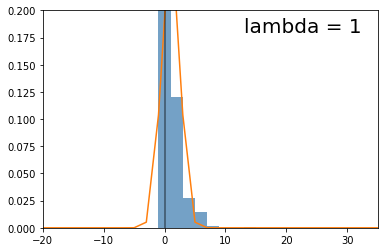

In [ ]:
lambdas = np.linspace(1, 20, 20).astype(int)
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.chi2.rvs(size=ssize, df=j)
    ls[i] = sp.stats.norm.pdf(t, loc=j, scale=np.sqrt(2 * lambdas[i]))
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1,
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.60, 0.9,  'lambda = %d'%lambdas[0], transform=ax.transAxes,
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('lambda = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(lambdas))
HTML(ani.to_jshtml())

## Uniform



In [ ]:
t = np.linspace(-Ndistribs, Ndistribs, Ndistribs*2+1).astype(int)
lambdas = np.linspace(1, Ndistribs, Ndistribs).astype(int)
center = 0
for i,j in enumerate(lambdas):
    #print(mus[i])
    y[i] = sp.stats.uniform.rvs(size=ssize, loc=center, scale=j)
fig, ax = pl.subplots()
ax.axis([-20, 35, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1,
                            facecolor='SteelBlue', alpha=0.75);
texts = ax.text(0.60, 0.9,  'scale = %d'%lambdas[0], transform=ax.transAxes,
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('scale = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
HTML(ani.to_jshtml())

# Central Limit Theorem

Central Limit Theorem states that given a high enough sample size, the following properties hold true:

* Sampling distribution's mean = Population mean (μ), and
* Sampling distribution's standard deviation (standard error) = σ/√n, such that
* for n ≥ 30, the sampling distribution tends to a normal distribution for all practical purposes.

#### Exponentially distributed population

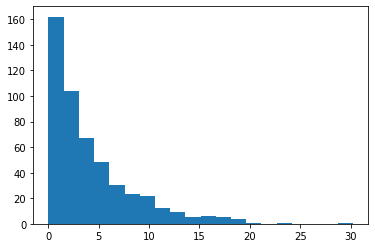

In [ ]:
# rate parameter for the exponentially distributed population
rate = 0.25

sample_size = 500

# population
exponential_sample = np.random.exponential((1/rate), sample_size)
plt.hist(exponential_sample, bins = 20);

In [ ]:
#Population mean
mu = 1/rate

# Population standard deviation
sd = np.sqrt(1/(rate**2))

print('Population mean:', mu)
print('Population standard deviation:', sd)

Population mean: 4.0
Population standard deviation: 4.0


In [ ]:
# drawing 50 random samples of size 2 from the exponentially distributed population
sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2'] )

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

# Taking a peek at the samples
df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,1.419674,0.583285,0.572287,0.957482,5.586699,3.754667,2.411803,3.182363,5.309235,5.332207,...,5.373588,2.695966,3.938203,7.600086,0.300521,0.734632,2.786850,0.113951,1.617151,2.395850
x2,9.565702,6.898341,5.960546,6.775717,1.498474,0.798657,4.064420,4.449030,5.111444,11.610292,...,3.679470,1.864973,6.733192,14.256923,4.132074,9.327365,13.720756,2.486369,4.332070,4.626056


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


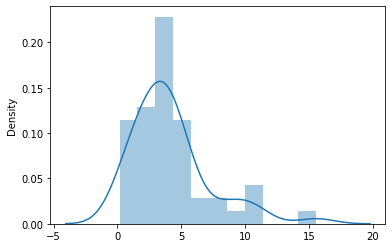

In [ ]:
# Calculating sample means and plotting their distribution
df2_sample_means = df2.mean()
sns.distplot(df2_sample_means);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


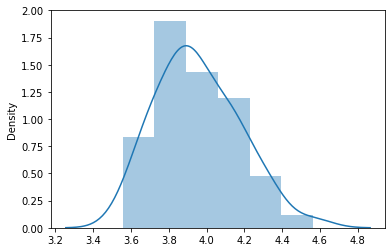

In [ ]:
# drawing 50 random samples of size 500
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample


df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means);

In [ ]:
#The first 5 values from the 50 sample means
df500_sample_means.head()

,Sample means
sample 1,4.201263
sample 2,3.976893
sample 3,3.843970
sample 4,3.913396
sample 5,3.906455


In [ ]:
# An estimate of the standard deviation of the sampling distribution can be obtained as:
np.std(df500_sample_means)

Sample means    0.156596
dtype: float64

In [ ]:
# according to the central limit theorem, the sampling distribution standard deviation should be:
# σ/√n
sd = np.sqrt(1/(rate**2)) # standard deviation of the original population

print(sd/np.sqrt(sample_size))



0.17888543819998318


# Random variables

In practice we never have access to the population, but to its samples. The descriptive statistics of the samples are random variables.

 Sample the population and see that the descriptive statistics of the sample (random variables) change at every sampling.

In [6]:
df = pd.read_csv('https://github.com/araldi/Python_for_biomedical_data_analysis/raw/main/Files/Homework_df_part5.csv')

In [7]:
df.head()

,Unnamed: 0,PatientID,AgeRecruit,Body_fat_percentage [%],Glucose [mmol/L],Glycated haemoglobin (HbA1c) [mmol/mol],HDL cholesterol [mmol/L],Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Diabetes diagnosed by doctor,Weight [Kg],IGF-1 [nmol/L],LDL direct [mmol/L]
0,0,1,66.0,26.2,6.309,44.7,0.913,1.0,104.0,100.0,169.0,1.0,80.8,19.684,3.241
1,1,2,46.0,27.8,NaN,34.9,NaN,0.0,66.0,93.0,159.0,0.0,53.1,NaN,NaN
2,2,3,51.0,27.2,4.888,NaN,1.514,1.0,110.0,119.0,171.0,0.0,99.5,26.463,4.384
3,3,4,57.0,19.7,4.593,37.1,1.397,1.0,87.0,99.0,165.0,0.0,72.1,17.968,2.814
4,4,5,63.0,23.0,5.333,37.0,2.060,1.0,94.0,95.0,170.0,0.0,74.2,31.057,2.525


In [8]:
# calculate BMI
df['BMI']= df['Weight [Kg]'] / np.power(df['Height [cm]']/100,2)

Text(0.5, 1.0, 'BMI in ~500.000 individuals')

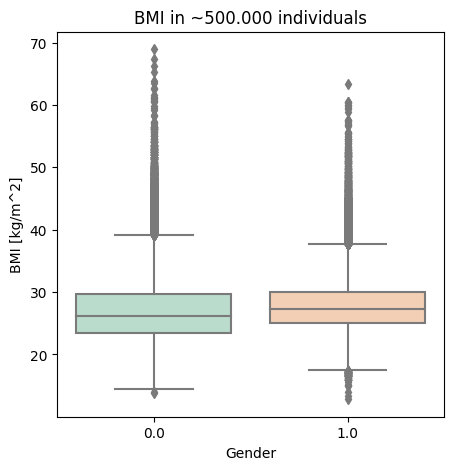

In [11]:
# Plot the mean BMI of the whole cohort
plt.figure(figsize =(5, 5))
sns.boxplot(data = df, x='Gender', y='BMI', palette ='Pastel2')
plt.xlabel('Gender')
plt.ylabel('BMI [kg/m^2]')
plt.title('BMI in ~500.000 individuals')

mean males:  27.720836650209076 
mean females:  27.080671982710154


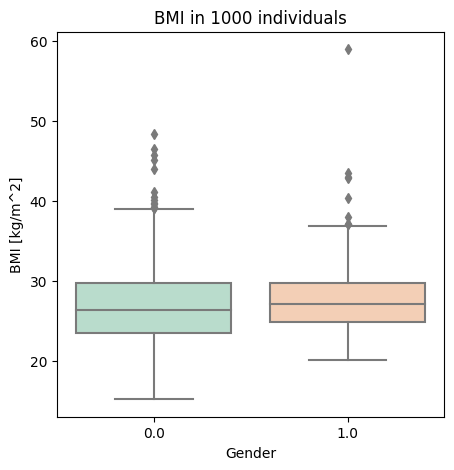

mean males:  27.601367238956456 
mean females:  27.08994382005152


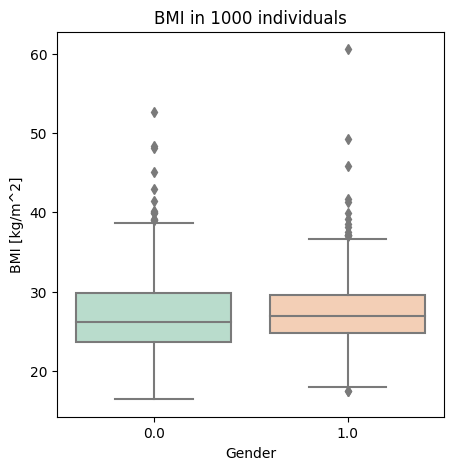

mean males:  27.6499108764364 
mean females:  27.173125471157917


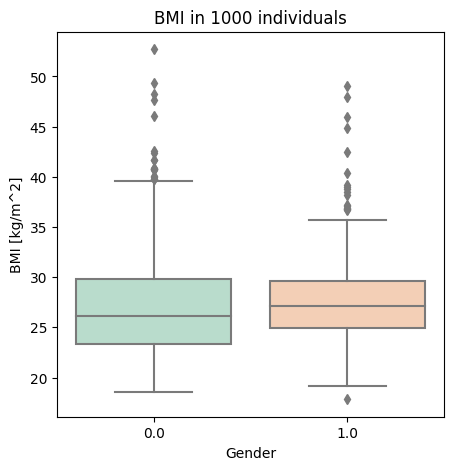

In [14]:
# Plot the mean BMI of samples of the cohort
for trials in range(3):
  plt.figure(figsize =(5, 5))
  df1 = df.sample(1000)
  sns.boxplot(data = df1, x='Gender', y='BMI', palette ='Pastel2')
  plt.xlabel('Gender')
  plt.ylabel('BMI [kg/m^2]')
  plt.title('BMI in 1000 individuals')
  print("mean males: ",  df1[df1['Gender'] == 1]['BMI'].mean(), '\nmean females: ',
        df1[df1['Gender'] == 0]['BMI'].mean())
  plt.show()

# Null hypothesis testing

Let's test if the observed differences between BMI in males and females are due to randomness.

In [ ]:
# What is the observed difference between male and female BMI?

# mean of BMI of males
np.mean(df[df['Gender'] == 1]['BMI'])

27.83811796618345

In [ ]:
# mean of BMI of females
np.mean(df[df['Gender'] == 0]['BMI'])

27.0914964589137

In [ ]:
observed_difference = np.mean(df[df['Gender'] == 1]['BMI']) - np.mean(df[df['Gender'] == 0]['BMI'])

In [ ]:
observed_difference

0.7466215072697509

In [ ]:
# Test if the null hypothesis is true

#null hypothesis: BMI in males and females is identical

# the null hypothesis array will contain the differences between two samples of the male population
# then we will test how many times the null array is bigger than the observed difference

null_hypothesis = np.empty(1)
df_males = df[df['Gender'] == 1]

# let's simulate the sampling in the same population (male)
for i in range(1000):
  males1 = np.mean(df_males['BMI'].sample(1000))
  males2 = np.mean(df_males['BMI'].sample(1000))
  difference = males1-males2
  null_hypothesis = np.append(null_hypothesis, difference)

(0.0, 1.0)

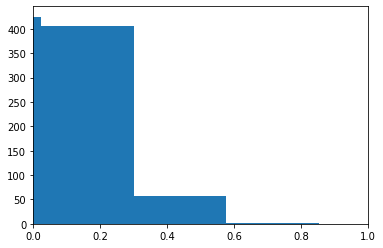

In [ ]:
plt.hist(null_hypothesis, bins = 100)
plt.xlim(0,1)

In [ ]:
# let's compare the sampling in males with the observed differences
np.mean(null_hypothesis >= observed_difference)

0.000999000999000999

The chances of the female and males having identical BMI distribution is x%